In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.shape

(569, 31)

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

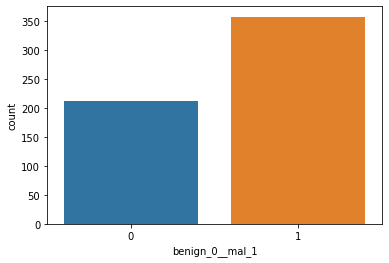

In [9]:
sb.countplot(x='benign_0__mal_1',data=df)

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


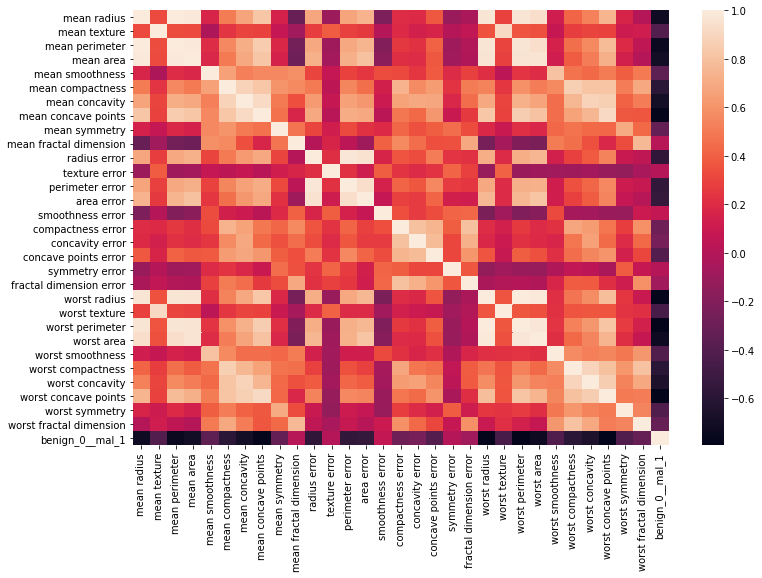

In [16]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr())

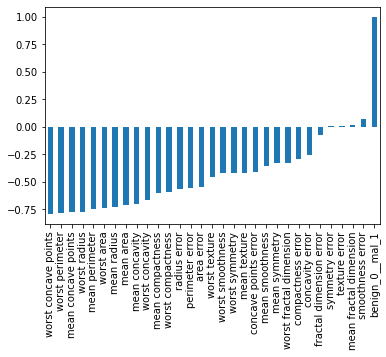

In [14]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

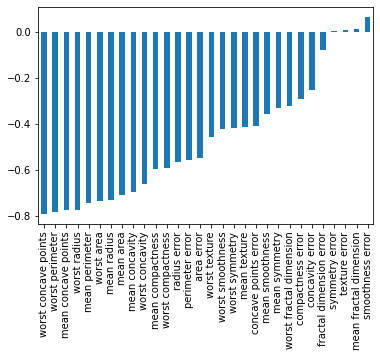

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [18]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler=MinMaxScaler()

In [76]:
X_train=scaler.fit_transform(X_train)

In [77]:
X_test=scaler.fit_transform(X_test)

In [78]:
from tensorflow.keras.models import Sequential

In [79]:
from tensorflow.keras.layers import Dense,Dropout

In [80]:
X_train.shape

(426, 30)

In [81]:
model=Sequential()
model.add(Dense(30,activation='relu'))

model.add(Dense(30,activation='relu'))

# This is a Binary Classification , hence select Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [82]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6684 - val_loss: 0.6553
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6191 - val_loss: 0.6086
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5733 - val_loss: 0.5600
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5232 - val_loss: 0.5011
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4670 - val_loss: 0.4329
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4018 - val_loss: 0.3628
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3433 - val_loss: 0.3061
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2972 - val_loss: 0.2663
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2624 - val_loss: 0.2323
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2376 - val_loss: 0.2110
Epoch 11

In [83]:
model_loss=pd.DataFrame(model.history.history)


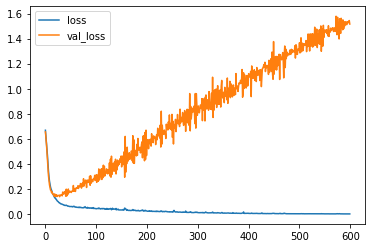

In [84]:
model_loss.plot()

In [85]:
model=Sequential()
model.add(Dense(30,activation='relu'))

model.add(Dense(30,activation='relu'))

# This is a Binary Classification , hence select Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [86]:
from tensorflow.keras.callbacks import EarlyStopping # Since It was overfitting because of use of epochs we use EarlyStopping

In [87]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [88]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [89]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6671 - val_loss: 0.6568
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6264 - val_loss: 0.6145
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5791 - val_loss: 0.5582
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5264 - val_loss: 0.5026
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4693 - val_loss: 0.4402
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4120 - val_loss: 0.3921
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3590 - val_loss: 0.3302
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3104 - val_loss: 0.3037
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2720 - val_loss: 0.2669
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2450 - val_loss: 0.2468
Epoch 11

In [90]:
model_loss=pd.DataFrame(model.history.history)

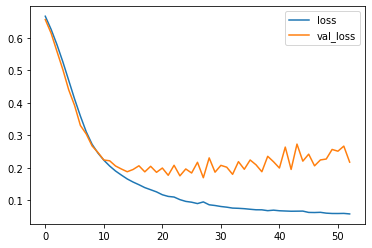

In [91]:
model_loss.plot()

In [92]:
from tensorflow.keras.layers import Dropout

In [93]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) #50% of neurons stops ramdomly. 
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
# This is a Binary Classification , hence select Sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [94]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7389 - val_loss: 0.7006
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6989 - val_loss: 0.6760
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6713 - val_loss: 0.6564
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6666 - val_loss: 0.6375
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6437 - val_loss: 0.6131
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.5811
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6041 - val_loss: 0.5521
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5710 - val_loss: 0.5193
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5490 - val_loss: 0.4742
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5013 - val_loss: 0.4317
Epoch 11

In [95]:
model_loss=pd.DataFrame(model.history.history)

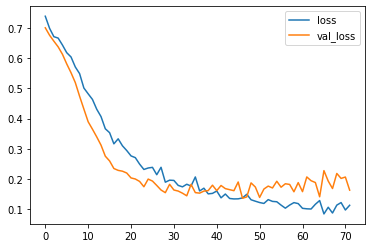

In [96]:
model_loss.plot()

In [97]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [98]:
predictions=model.predict_classes(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.99      0.91      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



In [101]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 8 80]]
